In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image

In [2]:
from nba_api.stats.endpoints.teamplayeronoffsummary import TeamPlayerOnOffSummary

from nba_api.stats.static.teams import get_teams

In [3]:
data_frames = []

for team in get_teams():
    team_id = team['id']
    on_off = TeamPlayerOnOffSummary(team_id=team_id, season='2021-22')
    merged_df = pd.merge(left=on_off.get_data_frames()[1], right=on_off.get_data_frames()[2], on=('TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'VS_PLAYER_ID', 'VS_PLAYER_NAME'), suffixes=('_ON', '_OFF'))
    data_frames.append(merged_df)
    time.sleep(0.15)

In [4]:
total_df = pd.concat(data_frames)

total_df.loc[:, 'MIN_G'] = total_df.MIN_ON / total_df.GP_ON

total_df = total_df.sort_values(by='MIN_G', ascending=False)

In [5]:
total_df = total_df.loc[total_df.GP_ON > 5]

total_df = total_df.iloc[:230]

In [6]:
total_df = total_df.iloc[:150]

In [7]:
plt.style.use('fivethirtyeight')

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=1.0)

Text(0.5, 1.0, "Player's impact on team's NET rating\n(top 150 players in minutes played)")

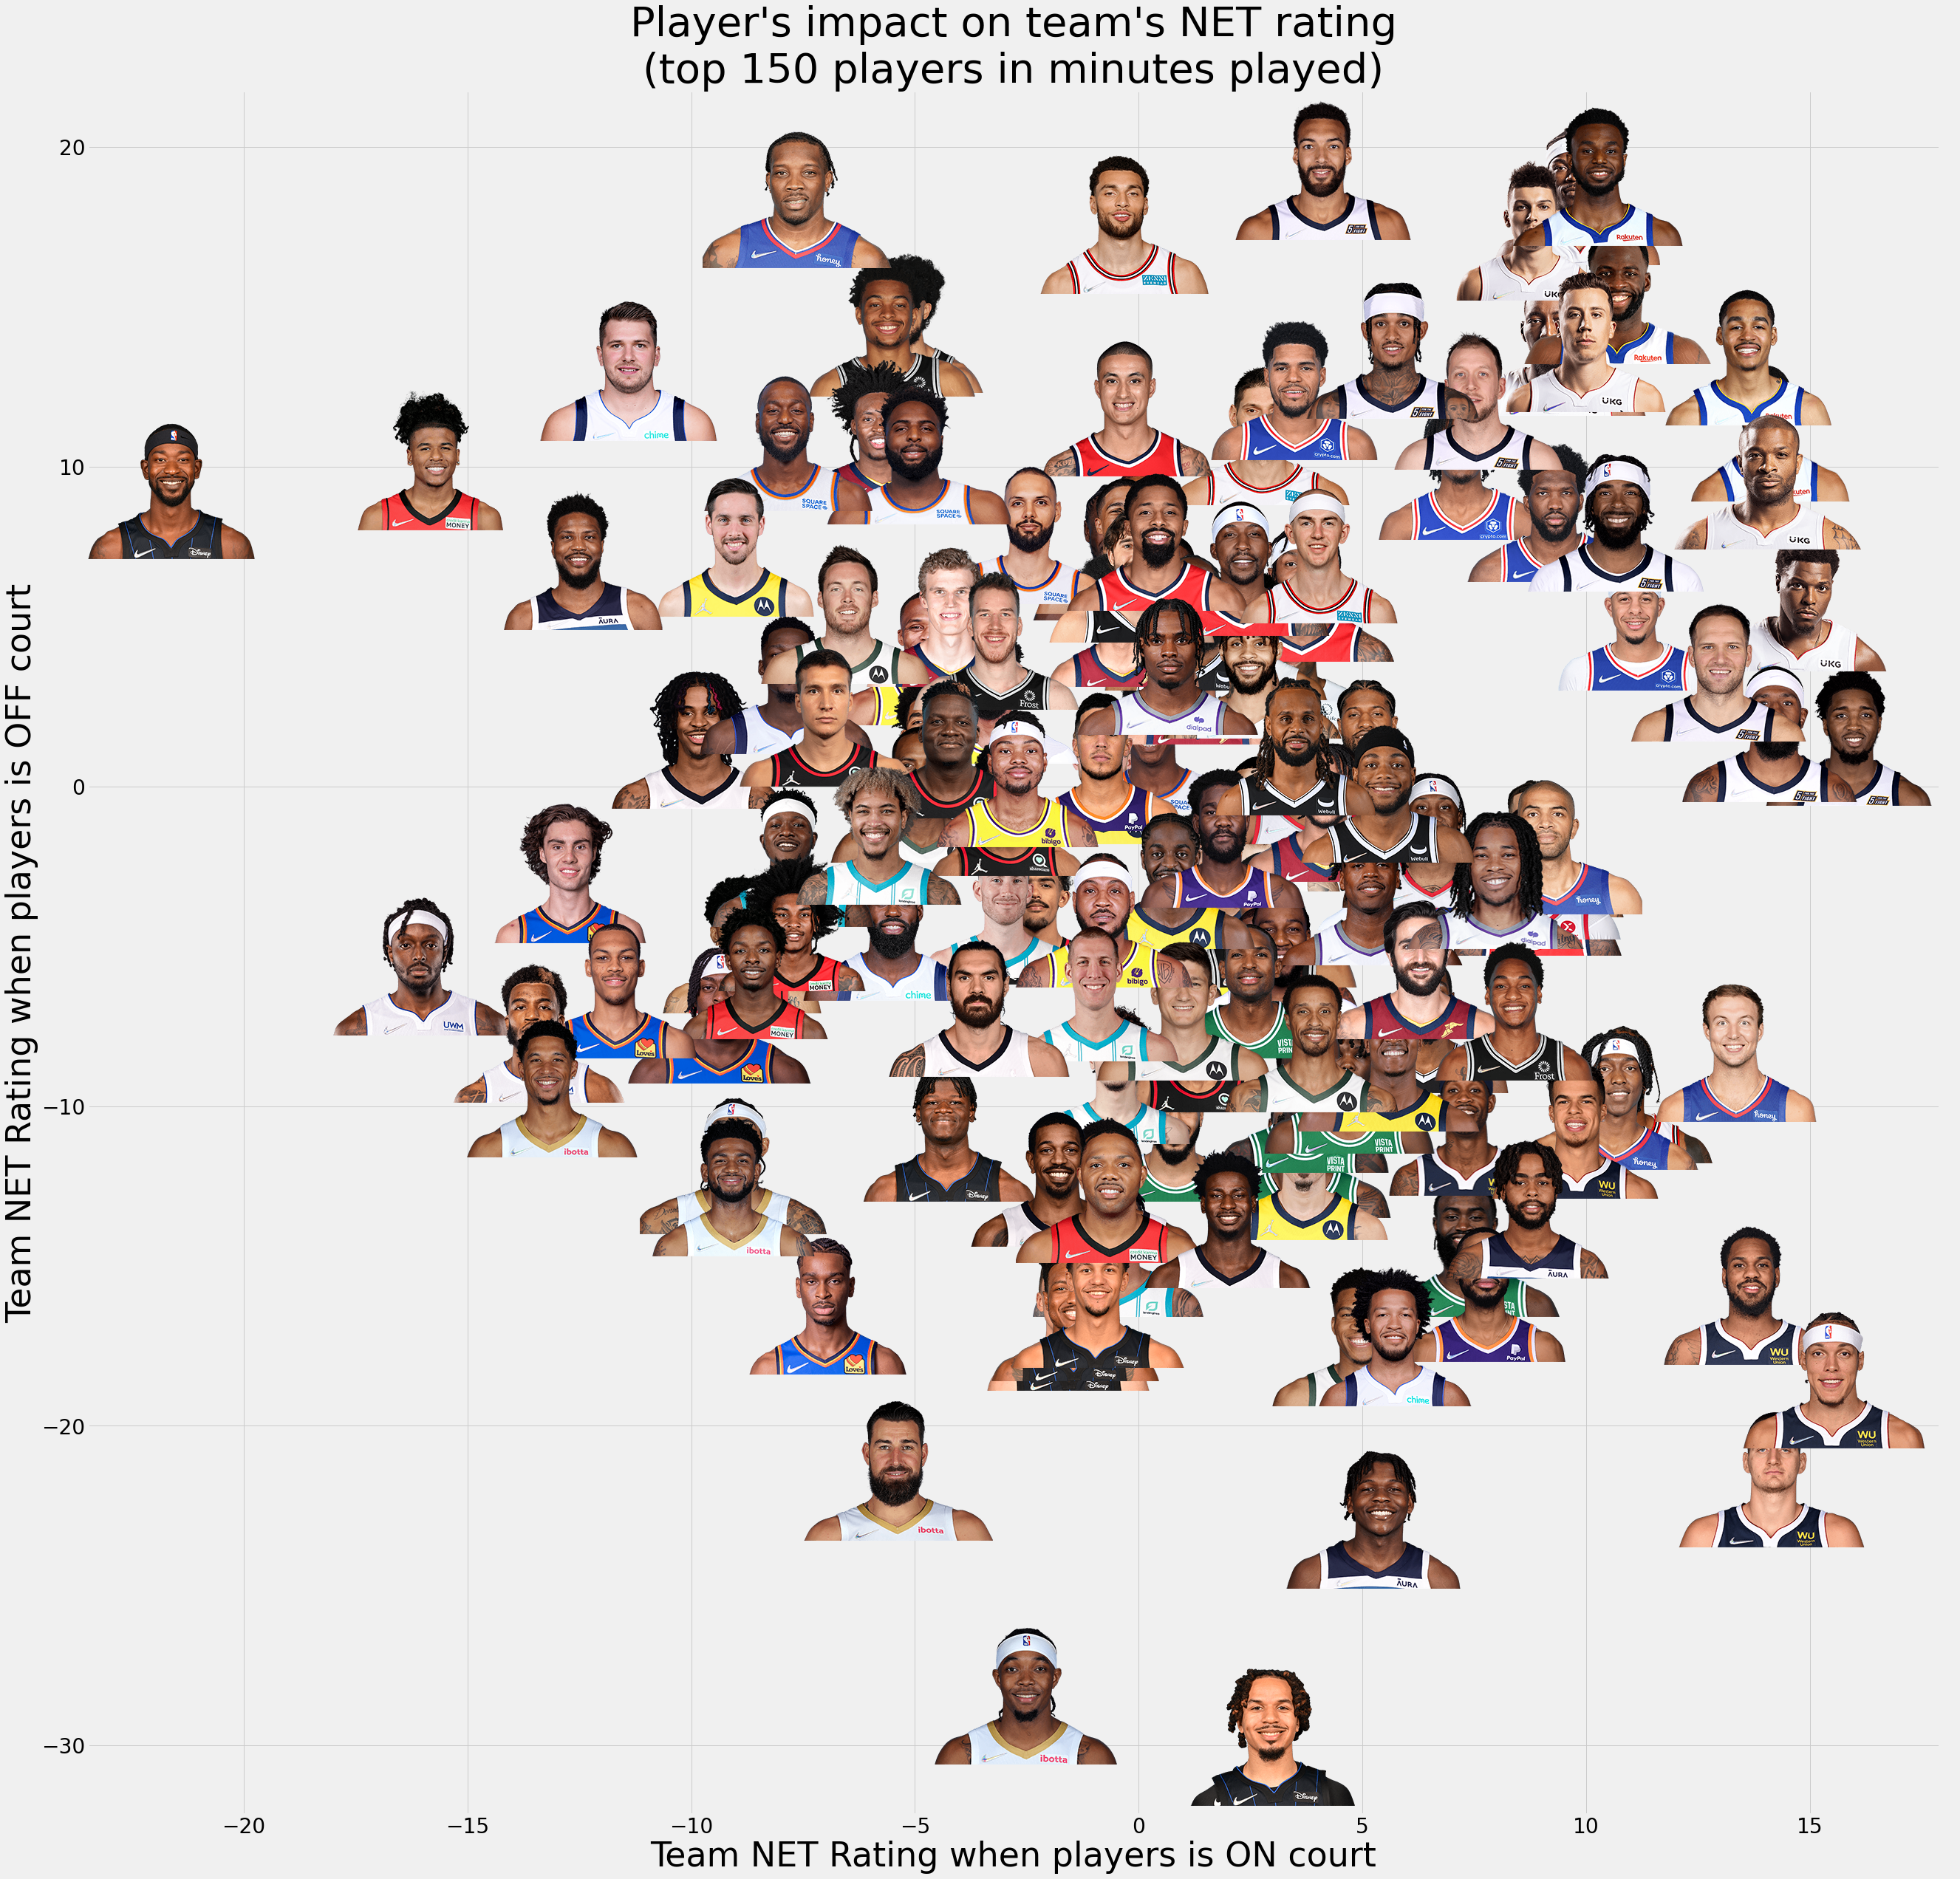

In [26]:
fig, ax = plt.subplots(figsize=(40, 40))

x=total_df.NET_RATING_ON
y=total_df.NET_RATING_OFF
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(total_df)):
    item = total_df.iloc[i]
    paths.append(f'player_imgs/{item.VS_PLAYER_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    

ax.tick_params(labelsize=28)
ax.set_xlabel("Team NET Rating when players is ON court", size=46)
ax.set_ylabel("Team NET Rating when players is OFF court", size=46)
ax.set_title("Player's impact on team's NET rating\n(top 150 players in minutes played)", size=56)
#ax.grid(lw=2.5)


### Warriors Only